C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3608 (\N{THAI 

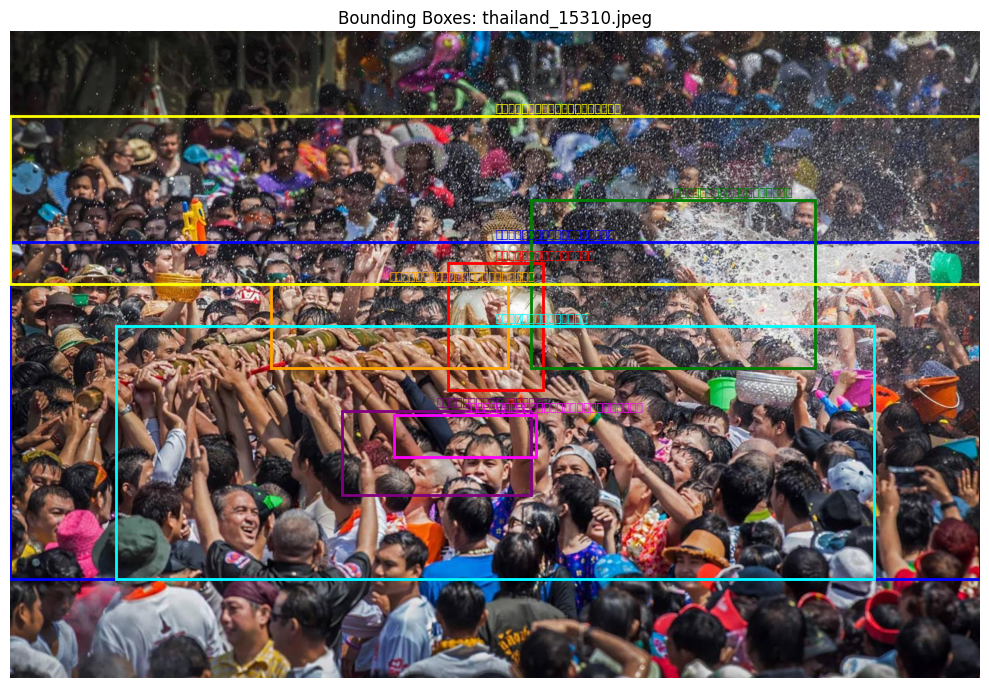

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vivobook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core

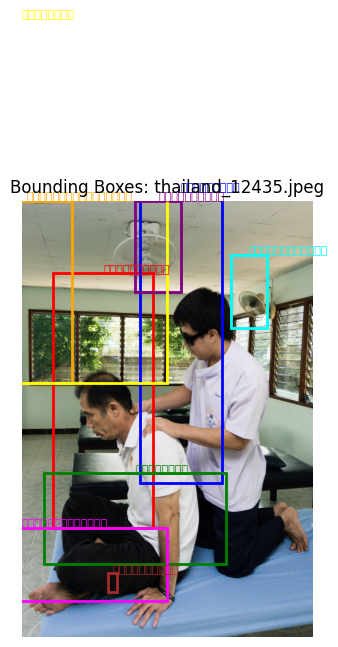

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3599 (\N{THAI CHARACTER TO PATAK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_27600\1001916206.py:52: UserWarning: Glyph 3660 (\N{THAI CHARACTER THANTHAKHAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vivobook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3599 (\N{THAI CHARACTER TO PATAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vivobook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3660 (\N{THAI CHARACTER THANTHAKHAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


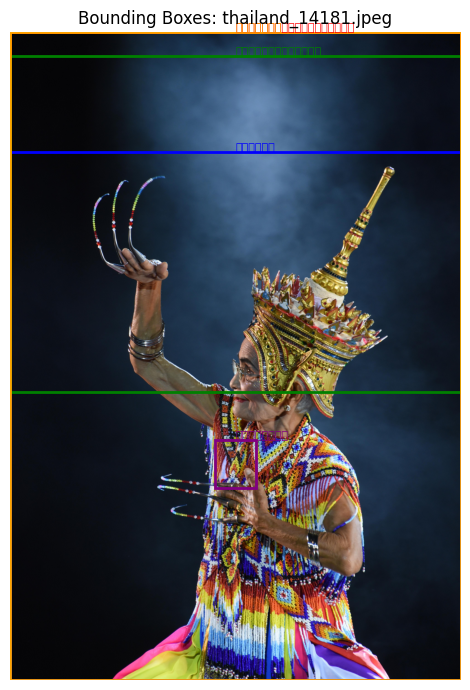

In [4]:
import json
import matplotlib.pyplot as plt
from PIL import Image
from typing import List

def visualize_scene_graph_bounding_boxes(
    image_path: str, 
    scene_graph_path: str, 
    scene_key: str = 'second',
    figsize: tuple = (10, 7)
) -> plt.Figure:
    """
    Visualize bounding boxes from a scene graph on an image.
    """
    try:
        with open(scene_graph_path, 'r', encoding='utf-8') as f:
            scene_graph = json.load(f)
        img = Image.open(image_path)
        original_width, original_height = img.size
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON in {scene_graph_path}")
        return None

    try:
        scene = scene_graph[scene_key]
        scene_width, scene_height = scene['width'], scene['height']
    except KeyError:
        print(f"Error: Scene key '{scene_key}' not found")
        return None
    
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    scale_coord = lambda x, orig, target: x * (target / orig)

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)

    for idx, (obj_id, obj) in enumerate(scene['objects'].items()):
        x = scale_coord(obj['x'], scene_width, original_width)
        y = scale_coord(obj['y'], scene_height, original_height)
        w = scale_coord(obj['w'], scene_width, original_width)
        h = scale_coord(obj['h'], scene_height, original_height)
        color = colors[idx % len(colors)]
        rect = plt.Rectangle((x - w/2, y - h/2), w, h, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y - h/2 - 10, obj['name'], color=color, fontsize=8, fontweight='bold')
    
    ax.set_title(f'Bounding Boxes: {image_path.split("/")[-1]}')
    ax.axis('off')
    plt.tight_layout()
    return fig


def visualize_multiple_images(image_scene_pairs: List[tuple]):
    """Visualizes bounding boxes for multiple images."""
    for image_path, scene_graph_path in image_scene_pairs:
        fig = visualize_scene_graph_bounding_boxes(image_path, scene_graph_path)
        if fig:
            plt.show()

if __name__ == '__main__':
    image_scene_pairs = [
        ('data/sea-vqa/thailand/thailand_15310.jpeg', 'data/sea-vqa/thailand/thailand_15310_thai_image_scene_graph_claudesonnet3.7.json'),
        ('data/sea-vqa/thailand/thailand_12435.jpeg', 'data/sea-vqa/thailand/thailand_12435_thai_image_scene_graph_gemini2.0flash.json'),
        ('data/sea-vqa/thailand/thailand_14181.jpeg', 'data/sea-vqa/thailand/thailand_14181_thai_image_scene_graph_gemini2.0flash.json')
    ]
    visualize_multiple_images(image_scene_pairs)
